# (연습) 정규 분포

**기본 설정**

`numpy`와 `pandas` 라이브러리를 각각 `np`와 `pd`로 불러온다.

In [24]:
import numpy as np
import pandas as pd

데이터프레임의 [chained indexing을 금지시키기 위한 설정](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)을 지정한다.
Pandas 3.0 버전부터는 기본 옵션으로 지정된다.

In [25]:
pd.options.mode.copy_on_write = True

주피터 노트북에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.
아래 코드는 주피터 노트북에서만 사용하며 일반적인 파이썬 코드가 아니다.

In [26]:
%precision 6

'%.6f'

아래 코드는 데이터프레임 내에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.

In [27]:
pd.set_option('display.precision', 6)

데이터 시각화를 위해 `matplotlib.pyplot`를 `plt`로,
`seaborn`을 `sns`로 불러온다.
`seaborn` 라이브러리는 통계 관련 데이터의 정보를 보다 세련되고 정확하게 전달하는 그래프를 그리는 도구를 제공한다.
`matplotlib` 라이브러리를 바탕으로 만들어져서 함께 사용해도 된다.

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

그래프 스타일을 `seaborn`에서 제공하는 `white` 스타일로 지정한다.

In [29]:
sns.set_style("white")

**데이터 저장소 디렉토리**

코드에 사용되는 [데이터 저장소의 기본 디렉토리](https://github.com/codingalzi/DataSci/tree/master/data)를 지정한다.

In [30]:
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'

### 예제: SOCR 데이터

아래 코드는 [The Statistics Online Computational Resource (SOCR)](https://www.socr.umich.edu) 에서 제공하는
데이터셋을 데이터프레임으로 불러온다.

데이터셋엔 25,000명의 키와 몸무게 정보가 담겨 있다.
키와 몸무게가 원래 인치<font size='2'>inch</font>와 파운드<font size='2'>lb</font> 단위로
제공되었지만 편의를 위해 각각 센티미터<font size='2'>cm</font>와 킬로그램<font size='2'>kg</font> 단위로 변환되었다.

데이터셋 원본은 [SOCR Data Dinov 020108 HeightsWeights](https://wiki.socr.umich.edu/?title=SOCR_Data_Dinov_020108_HeightsWeights&redirect=no)에서
다운로드할 수 있다.

보다 많은 데이터셋은 [SOCR Data](https://wiki.socr.umich.edu/index.php/SOCR_Data)에서 확인할 수 있다.

In [31]:
socr = pd.read_csv(data_url+"SOCR-HeightWeight.csv", header=0)

처음 다섯 명의 키와 몸무게는 다음과 같다.

In [32]:
socr.head()

,Height,Weight
0,167.1,51.3
1,181.6,61.9
2,176.3,69.4
3,173.3,64.6
4,172.2,65.5


총 25,000명의 키와 몸무게 데이터가 포함되었다.

In [10]:
socr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  25000 non-null  float64
 1   Weight  25000 non-null  float64
dtypes: float64(2)
memory usage: 390.8 KB


**문제 1**

(1) 키의 분포를 확인하기 위해 밀도 히스토그램과 
커널 밀도 추정(KDE) 기법으로 찾아진 확률 밀도 함수의 그래프를 그려라.

답:

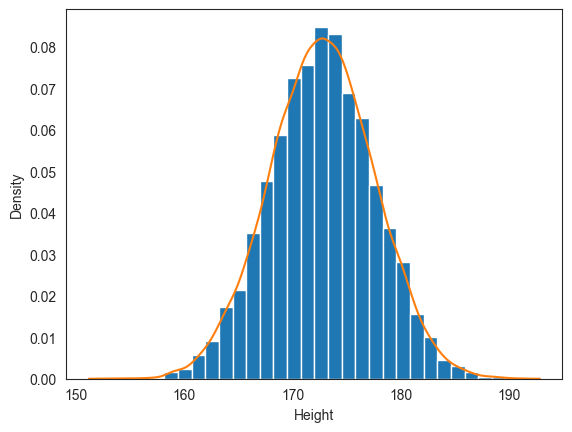

In [11]:
fig, ax = plt.subplots()

# 아들 키 밀도 히스토그램
socr['Height'].plot.hist(ax=ax, bins=30, density=True, legend=False)

# KDE 기법으로 계산된 확률 밀도 함수 그래프
kde = sns.kdeplot(ax=ax, data=socr['Height'])

ax.set_xlabel('Height')
ax.set_ylabel('Density')

plt.show()

(2) 키의 평균값과 분산을 가리키는 `mu_height`, `sigma_height` 변수를 선언하라.

답:

In [12]:
desc_height = socr['Height'].describe()
desc_height

count    25000.000000
mean       172.702456
std          4.830493
min        153.100000
25%        169.400000
50%        172.700000
75%        176.000000
max        190.900000
Name: Height, dtype: float64

- 키 평균값

In [13]:
mu_height = desc_height.loc['mean']
mu_height

172.702456

- 키 표준편차

In [14]:
sigma_height = desc_height.loc['std']
sigma_height

4.830493

(3) `scipy.stats` 모듈의 `norm` 객체를 이용하여 직접 확률 변수로 선언한다.
`norm` 객체를 활용할 때 평균값과 표준편차를 지정해야 한다.

답:

In [15]:
from scipy.stats import norm

X_height = norm(loc=mu_height, scale=sigma_height)

(4) `mu_height`와 `sigma_height`를 각각 평균값과 표준편차로 갖는 정규 분포의 확률 밀도 함수 그래프와
앞서 KDE 기법으로 계산된 확률 밀도 함수 그래프가 거의 동일함을 보여주는 코드를 작성하라.

답:

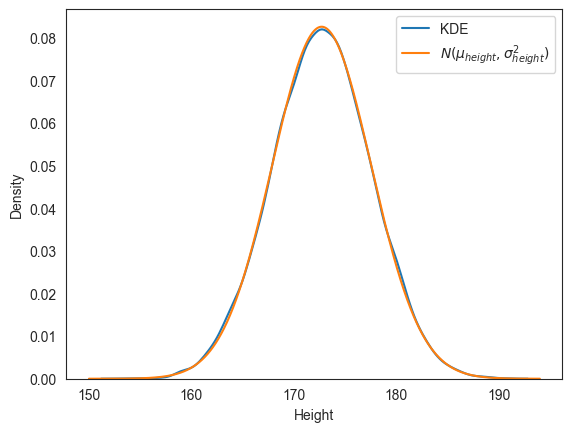

In [16]:
fig, ax = plt.subplots()

# 키 데이터에 대해 KDE 기법으로 추정된 확률 밀도 함수 그래프
kde = sns.kdeplot(ax=ax, data=socr['Height'], label='KDE')

# mu_height와 sigma_height를 이용한 정규 분포의 확률 밀도 함수 그래프
x = np.arange(150, 194, 0.01)
f = X_height.pdf
plt.plot(x, f(x), label=r'$N(\mu_{height}, \sigma_{height}^2)$')

ax.set_xlabel('Height')
ax.set_ylabel('Density')

ax.legend()

plt.show()

(5) 우연히 선택된 사람의 키가 165 이하일 확률 $P(X \leq 165)$를 계산하라.
또한 정규 분포의 확률 밀도 함수의 그래프와 x-축 사이의 특정 구간의 영역으로
표현하는 코드를 작성하라.

답:

- 키가 165 이하 또는 180 이상일 확률

In [17]:
X_height.cdf(165) + (1 - X_height.cdf(180))

0.120836

- 그래프 영역 표시 코드

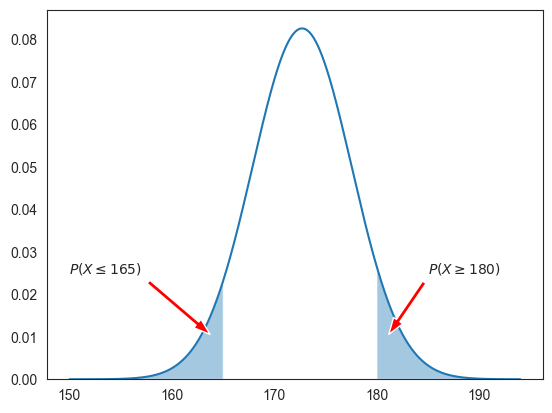

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

x = np.arange(150, 194, 0.01)
f = X_height.pdf
plt.plot(x, f(x))
plt.fill_between(x, f(x), where=((x <= 165) | (x >= 180)), alpha=0.4)

ax.annotate(r'$P(X \leq 165)$', xy=(164 ,0.01), xytext=(150, 0.025),
            arrowprops=dict(facecolor='red', shrink=0.04, width=3, headwidth=8))
ax.annotate(r'$P(X \geq 180)$', xy=(181 ,0.01), xytext=(185, 0.025),
            arrowprops=dict(facecolor='red', shrink=0.04, width=3, headwidth=8))

ax.set_ylim(0, 0.087)

plt.show()

(6) 데이터셋에서 키가 165 이하인 샘플의 비율을 이용하여 키가 165 이하일 확률을 직접 계산하라.

답:

In [19]:
# 165 이상 또는 180 이상인 경우만 True
mask_165_180 = (socr['Height'] <= 165) | (socr['Height'] >= 180)

# 전체 데이터셋에서 True인 샘플의 비율
mask_165_180.sum()/len(socr)

0.125200

(7) 키 165와 180의 표준 점수를 계산하라.

답:

- 165의 표준점수

In [20]:
z_165 = (165 - mu_height)/sigma_height
z_165

-1.594549

- 180의 표준점수: 

In [21]:
z_180 = (180 - mu_height)/sigma_height
z_180

1.510724

(8) 키가 165 이하이거나 180 이상일 확률을 표준화 이전과 이후에 대해
각각 계산한 다음에 결과가 동일함을 확인하라.

- 키 165 이하일 확률 = 표준 점수가 -1.594549 이하일 확률

In [22]:
X_height.cdf(165) == norm.cdf(z_165)

True

- (키 180 이상일 확률) = (표준 점수가 1.510724 이상일 확률)

In [23]:
(1 - X_height.cdf(180)) == (1 - norm.cdf(z_180))

True

**문제 2**

(준비중 ...)

**문제 3**

(준비중 ...)

**정규분포 활용: 푸아송 분포 확률 계산**

* 전제
$$X ∼ P_{0}(𝜆)$$
$$𝜆>15$$

* 결론
$$X ∼ N(𝜆,𝜆)$$
$$_{주의:\ 연속성\ 보정\ 필요}$$

**예제**

러브트레인이라는 롤러코스터가 1년에 고장나는 횟수가 𝜆=40일 때, 1년에 52회 미만으로 고장날 확률은 얼마인가?

답:

$X$가 1년에 고장나는 횟수를 나타내면 $X ∼P_0(40)$이다.   
$𝜆>15$이므로 $X∼N(40, 40)$이 성립한다.    
따라서 푸아송분포에서 $P(X<52)$는 정규분포에서 

$$
P(Z<\frac{51.5-40}{\sqrt{40}})=P(Z<1.82)=0.9656
$$

이다.   

이항분포의 경우처럼 연속성 보정을 사용하는 것에 주의해야 한다.